ID: 19-39608-1

# Importing modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tnrange

# Loading Images for Training

In [3]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

train_data = []

for i in labels:
    for k in tnrange(1500):
        path = 'CIFAR-10-images - Copy/train/' + i + '/' + ((4-len(str(k))) * '0') + str(k) + '.jpg'
        train_data.append([plt.imread(path),labels.index(i)])


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

# Visualization of training images of all categories

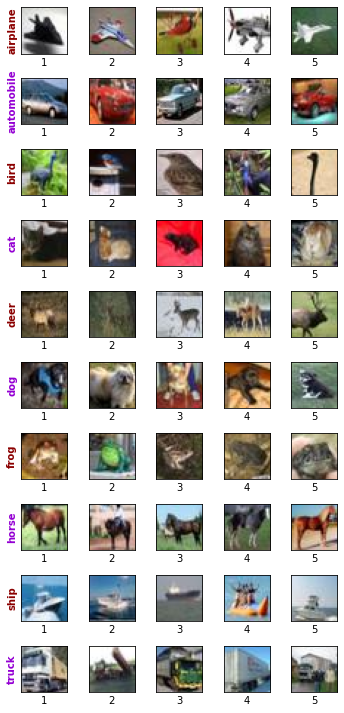

In [3]:
ROWS = 10
COLS = 5
i = 0
temp = 0

plt.figure(figsize=(COLS, ROWS))
for r in labels:
    for c in range(temp, temp + 1500, 1500):
        for n in range(COLS):
            plt.subplot(ROWS, COLS, i+1)
            plt.imshow(train_data[c+n][0], cmap=plt.cm.gray_r)

            plt.xticks([])
            plt.yticks([])
            plt.xlabel(n+1)
            if(n == 0):
                if(labels.index(r) % 2 == 0):
                    plt.ylabel(r, color ='darkred', fontweight='bold')
                else:
                    plt.ylabel(r, color ='darkviolet', fontweight='bold')
            i += 1
        temp += 1500
plt.tight_layout()
plt.grid()
plt.show() 

# Loading Images for Testing

In [4]:
test_data = []

for i in labels:
    for k in tnrange(150):
        path = 'CIFAR-10-images - Copy/test/' + i + '/' + ((4-len(str(k))) * '0') + str(k) + '.jpg'
        test_data.append([plt.imread(path),labels.index(i)])

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

# Visualization of testing images of all categories

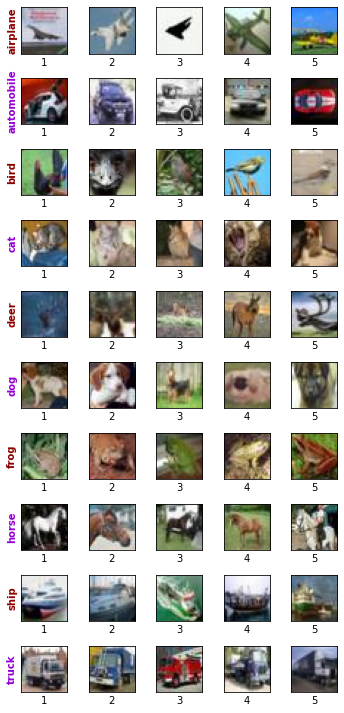

In [5]:
ROWS = 10
COLS = 5
i = 0
temp = 0

plt.figure(figsize=(COLS, ROWS))
for r in labels:
    for c in range(temp, temp + 150, 150):
        for n in range(COLS):
            plt.subplot(ROWS, COLS, i+1)
            plt.imshow(test_data[c+n][0], cmap=plt.cm.gray_r)

            plt.xticks([])
            plt.yticks([])
            plt.xlabel(n+1)
            if(n == 0):
                if(labels.index(r) % 2 == 0):
                    plt.ylabel(r, color ='darkred', fontweight='bold')
                else:
                    plt.ylabel(r, color ='darkviolet', fontweight='bold')
            i += 1
        temp += 150
plt.tight_layout()
plt.grid()
plt.show() 

In [6]:
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
accuracy_array = []

def distance(test,k):    
    x=[]

    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                print(CATEGORIES[train_data[i][1]])
                break

In [7]:
def distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                prediction_array.append(train_data[i][1])
                break 
    check = []
    for i in range(0, len(CATEGORIES)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(CATEGORIES)):
        if check[final_prediction] == max(check):
            return final_prediction

# Single prediction with K=5

In [8]:
Single_Prediction = distance_accuracy(test_data[1036][0],5)    #K =5
print('Prediction : ' + CATEGORIES[Single_Prediction])
print('Correct :' + CATEGORIES[test_data[1036][1]])

Prediction : bird
Correct :frog


Text(0.5, 0, 'frog')

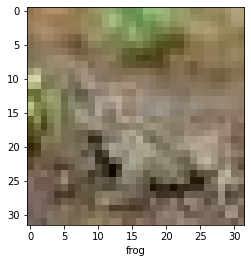

In [9]:
plt.imshow(test_data[1036][0],cmap=plt.cm.gray)
plt.xlabel(CATEGORIES[test_data[1036][1]])

In [10]:
def single_accuracy(k, test_data_number):
    print('Calculating...   (k = '+str(k)+')')
    accuracy_count = 0
    for j in tnrange(0, test_data_number):
        if distance_accuracy(test_data[j][0], k) == test_data[j][1]:
            accuracy_count = accuracy_count + 1

    accuracy = (accuracy_count*100)/(j+1)
    
    print('-------------------------------------------------------')
    print('\t\tAccuracy when k = '+ str(k) +' is '+ str(accuracy))
    print('-------------------------------------------------------')
    
    return accuracy

# Changing K-value

In [11]:
k = 12 #it takes too much time, that's why i reduced the k value.

for i in range(0, k):  
    accuracy_array.append(single_accuracy(i+1, len(test_data)))

Calculating...   (k = 1)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 1 is 21.066666666666666
-------------------------------------------------------
Calculating...   (k = 2)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 2 is 18.4
-------------------------------------------------------
Calculating...   (k = 3)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 3 is 21.133333333333333
-------------------------------------------------------
Calculating...   (k = 4)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 4 is 20.533333333333335
-------------------------------------------------------
Calculating...   (k = 5)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 5 is 20.933333333333334
-------------------------------------------------------
Calculating...   (k = 6)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 6 is 20.2
-------------------------------------------------------
Calculating...   (k = 7)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 7 is 21.2
-------------------------------------------------------
Calculating...   (k = 8)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 8 is 20.933333333333334
-------------------------------------------------------
Calculating...   (k = 9)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 9 is 21.133333333333333
-------------------------------------------------------
Calculating...   (k = 10)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 10 is 21.066666666666666
-------------------------------------------------------
Calculating...   (k = 11)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 11 is 21.2
-------------------------------------------------------
Calculating...   (k = 12)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 12 is 21.533333333333335
-------------------------------------------------------


In [15]:
k = 14

for i in range(12, k):  
    accuracy_array.append(single_accuracy(i+1, len(test_data)))

Calculating...   (k = 13)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 13 is 20.533333333333335
-------------------------------------------------------
Calculating...   (k = 14)


  0%|          | 0/1500 [00:00<?, ?it/s]

-------------------------------------------------------
		Accuracy when k = 14 is 20.733333333333334
-------------------------------------------------------


In [17]:
k_array = list(range(1, k+1))

# Ploting K vs Accuracy Graph

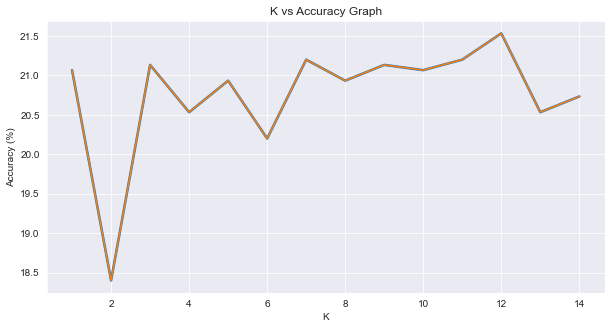

In [20]:
import seaborn as sns
import pandas as pd

dataframe = []
for i,j in zip(k_array, accuracy_array):
    dataframe.append([i,j])
df = pd.DataFrame (dataframe, columns = ['K', 'Accuracy'])

plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="K", y="Accuracy", data=df, linewidth=2.5)
ax.set(xlabel='K', ylabel='Accuracy (%)', title='K vs Accuracy Graph')
sns.set_style("darkgrid")
sns.lineplot(x="K", y="Accuracy", data=df)
plt.show()

# Result Discussion

Different values from 1 to 14 have been tested to find the appropriate value for K. Since this is a time consuming process, I reduced the dataset and changed the value of k to 14. The most preferred value for K is 5. Because a low value for K such as K = 1 or K = 2, can cause noise and lead to the influence of outsiders on the model.

Finally, after applying the method, I obtained a 20.5 percent average accuracy (like I reduced the dataset and tested the K value for 1 to 14). When graphing the value of k from 1 to 14, it can be noted that the accuracy ranges from 18 to 21.5 percent. For the value of K = 12, the greatest accuracy is over 21.53 percent. Because the accuracy of KNN changes with the dataset, it is evident that this approach is not adequate for classification of "CIFAR-10" datasets when considering the percentage of accuracy.

KNN works well with a small number of input variables, but struggles when the number of inputs is very large. As this 'CIFAR-10' dataset is too lagre, the KNN algorithm couldn't perform well for classification.So it has been proven as a bad dchoice for the task.